In [53]:
# pip install yfinance

In [54]:
import yfinance as yf

In [55]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [56]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [57]:
google_data.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2006-02-27,9.650675,9.683306,9.400989,9.425464,410019113
2006-02-28,8.964412,9.827678,8.368383,9.720387,1583416872
2006-03-01,9.018306,9.133260,8.931780,9.111258,484256334
2006-03-02,9.306308,9.421262,8.954030,9.005450,735960259
2006-03-03,9.349076,9.573050,9.289250,9.500369,480273461


In [58]:
google_data.shape

(5032, 5)

In [59]:
google_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,5032.000000,5032.000000,5032.000000,5032.000000,5.032000e+03
mean,60.922057,61.560247,60.255414,60.893632,8.455181e+07
std,62.572369,63.282944,61.819250,62.539228,1.002250e+08
min,6.364233,6.659158,6.113560,6.489570,1.584340e+05
25%,14.502957,14.645043,14.381081,14.532376,2.496540e+07
50%,35.673937,35.988828,35.439697,35.750863,4.095340e+07
75%,90.305689,91.075047,89.203461,90.243174,1.071832e+08
max,344.899994,350.149994,338.589996,348.515015,1.583417e+09


In [60]:
google_data.info()

<class 'pandas.DataFrame'>
DatetimeIndex: 5032 entries, 2006-02-27 to 2026-02-26
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   5032 non-null   float64
 1   (High, GOOG)    5032 non-null   float64
 2   (Low, GOOG)     5032 non-null   float64
 3   (Open, GOOG)    5032 non-null   float64
 4   (Volume, GOOG)  5032 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 235.9 KB


In [61]:
google_data.isna().sum()


Price   Ticker
Close   GOOG      0
High    GOOG      0
Low     GOOG      0
Open    GOOG      0
Volume  GOOG      0
dtype: int64

In [62]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Closing price of Google data')

<Figure size 1500x500 with 0 Axes>

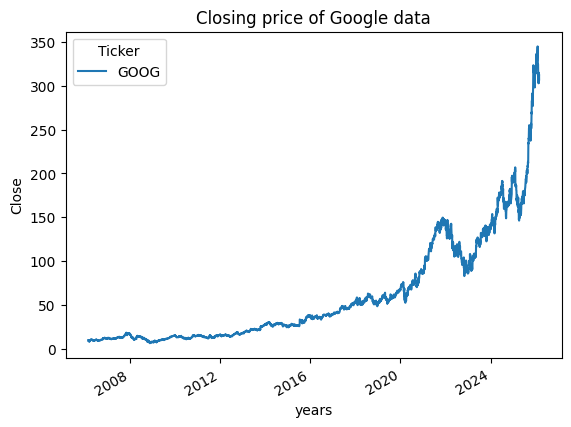

In [63]:
plt.figure(figsize = (15,5))
google_data['Close'].plot()
plt.xlabel("years")
plt.ylabel("Close")
plt.title("Closing price of Google data")

In [64]:

def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")
    

In [65]:
google_data.columns

MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

In [66]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [67]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [68]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [69]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 0
2005 0
2006 214
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252


In [70]:
google_data['MA_for_250_days'] = google_data['Close'].rolling(250).mean()

<Figure size 640x480 with 0 Axes>

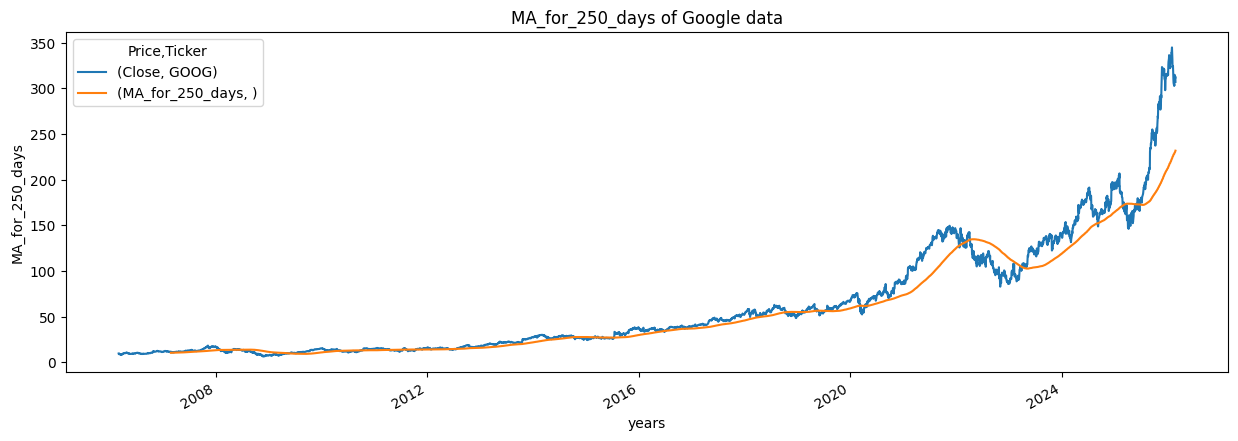

In [71]:
plot_graph((15,5), google_data[['Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

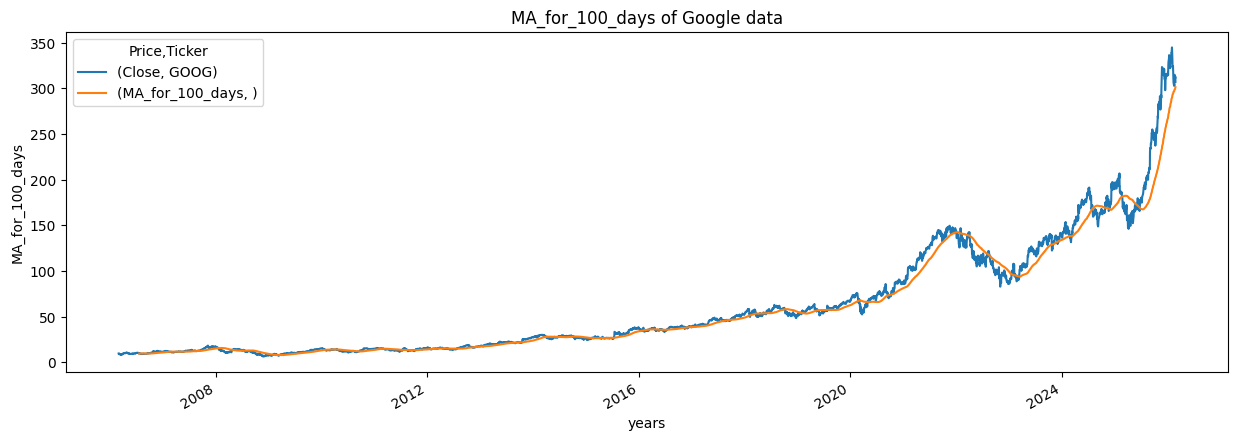

In [72]:
google_data['MA_for_100_days'] = google_data['Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Close','MA_for_100_days']], 'MA_for_100_days')

In [73]:
import matplotlib.pyplot as plt

def plot_graph(figsize, values, full_data):
    plt.figure(figsize=figsize)
    plt.plot(values)
    plt.title(full_data)
    plt.show()
    

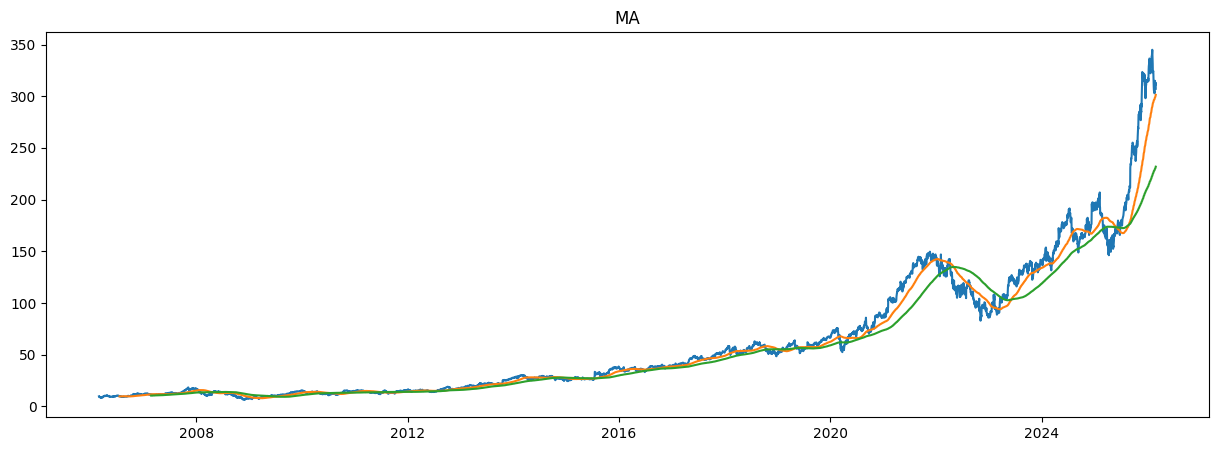

In [74]:
plot_graph((15,5), google_data[['Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [75]:
google_data['percentage_change_cp'] = google_data['Close'].pct_change()
google_data[['Close','percentage_change_cp']].head()

Price,Close,percentage_change_cp
Ticker,GOOG,
Date,,
2006-02-27,9.650675,NaN
2006-02-28,8.964412,-0.071110
2006-03-01,9.018306,0.006012
2006-03-02,9.306308,0.031935
2006-03-03,9.349076,0.004596


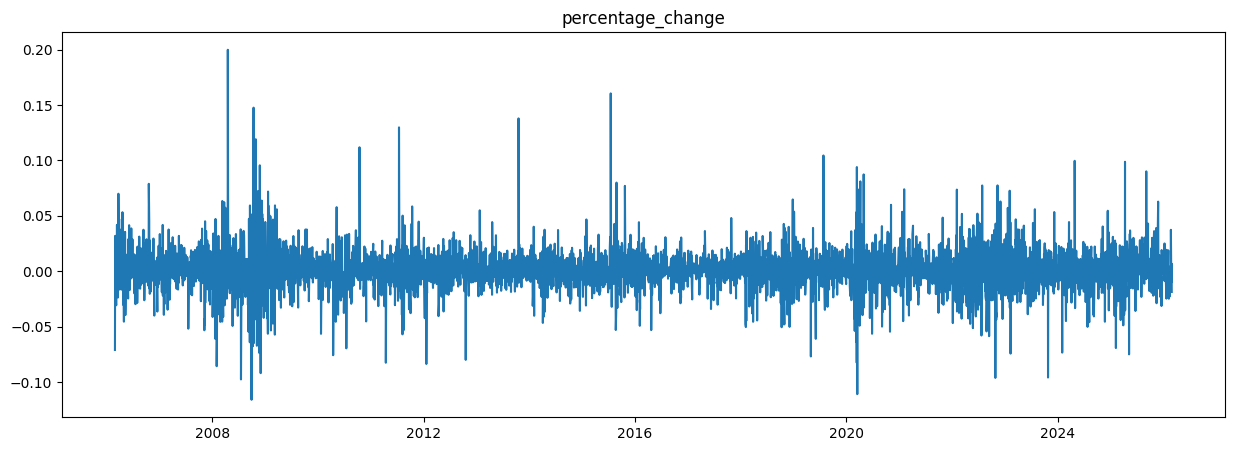

In [76]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [77]:
Adj_close_price = google_data[['Close']]

In [78]:
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([344.8999939]), array([6.36423302]))

In [79]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.00970781],
       [0.00768066],
       [0.00783986],
       ...,
       [0.89962661],
       [0.9058593 ],
       [0.88849036]], shape=(5032, 1))

In [80]:
len(scaled_data)

5032

In [81]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [82]:
x_data[0],y_data[0]

(array([[0.00970781],
        [0.00768066],
        [0.00783986],
        [0.00869059],
        [0.00881692],
        [0.00808083],
        [0.0078143 ],
        [0.00704243],
        [0.00624794],
        [0.0058463 ],
        [0.00581417],
        [0.00684381],
        [0.00635747],
        [0.00593904],
        [0.00601353],
        [0.00662693],
        [0.00602302],
        [0.00604493],
        [0.00616687],
        [0.00791289],
        [0.00819695],
        [0.00874535],
        [0.01004372],
        [0.00956614],
        [0.00968006],
        [0.00965815],
        [0.01072722],
        [0.01099377],
        [0.01122671],
        [0.01086013],
        [0.01160643],
        [0.01111571],
        [0.01106386],
        [0.01056803],
        [0.01090832],
        [0.01071992],
        [0.01117705],
        [0.01150566],
        [0.01311949],
        [0.01336777],
        [0.01239363],
        [0.01230674],
        [0.01187297],
        [0.01172035],
        [0.01032997],
        [0

In [83]:

int(len(x_data)*0.7)

3452

In [84]:
4908-100-int(len(x_data)*0.7)

1356

In [85]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [86]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3452, 100, 1)
(3452, 1)
(1480, 100, 1)
(1480, 1)


In [87]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [88]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

c:\Users\KIIT0001\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [89]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [90]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 167s 45ms/step - loss: 5.9929e-05
Epoch 2/2
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 162s 47ms/step - loss: 2.7620e-05


In [91]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [92]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step


In [93]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 55.50782 ],
       [ 56.874447],
       [ 58.139812],
       ...,
       [288.84192 ],
       [288.99557 ],
       [289.2878  ]], shape=(1480, 1), dtype=float32)

In [94]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 58.88386154],
       [ 60.06351852],
       [ 60.12157822],
       ...,
       [310.92001343],
       [313.02999878],
       [307.1499939 ]], shape=(1480, 1))

In [95]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [96]:
rmse

np.float64(8.973309945814252)

In [97]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2020-04-07,58.883862,55.507820
2020-04-08,60.063519,56.874447
2020-04-09,60.121578,58.139812
2020-04-13,60.424805,58.815426
2020-04-14,62.989063,59.129539


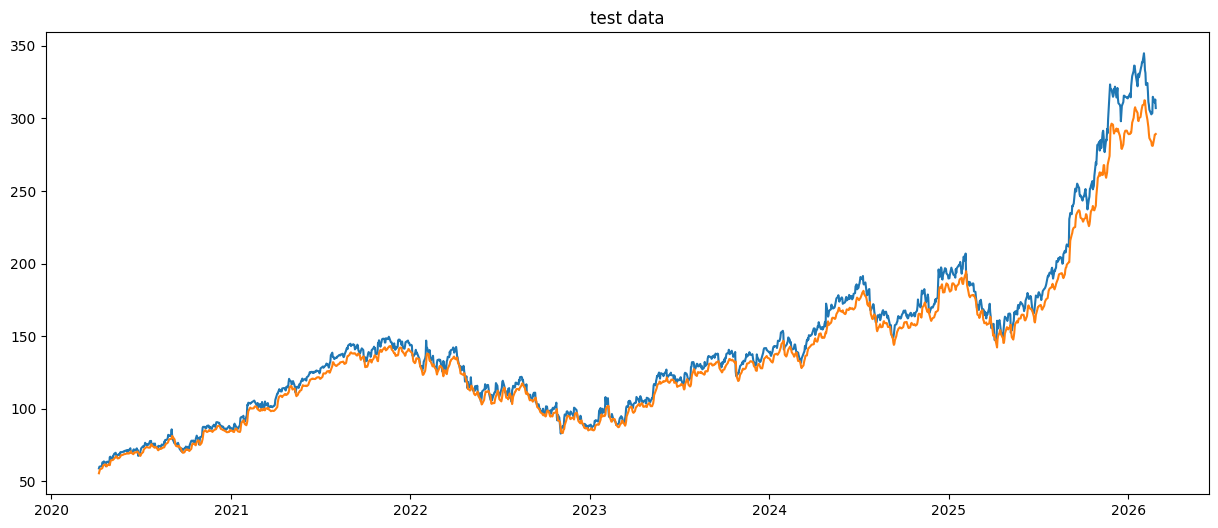

In [98]:
plot_graph((15,6), ploting_data, 'test data')

In [102]:
rmse = np.sqrt(np.mean((inv_predictions - inv_y_test)**2))
print("RMSE:", rmse)

RMSE: 8.973309945814252


In [103]:
model.save("Latest_stock_price_model.keras")

In [104]:
import pickle

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [105]:
google_data.columns = google_data.columns.get_level_values(0)